In [2]:
import pandas as pd
import numpy as np
import pickle as pkl
import warnings
import datetime
import numpy as np
from numpy import random
from datetime import datetime as dt
import datetime
from get_lineups import mlb_scrape

from build_datasets.dataset_builder import DatasetBuilder
from utils import convert_rotowire_weather_to_proference
from simulate import GameSimulation


warnings.simplefilter('ignore')

# Code to Build Data Overnight -- NEED TO INCLUDE PITCH COLLECTION FROM MLB DATA COLLECTION

In [3]:
# Load in the Model
with open('../train_models/data/models/XGBoost_model.pkl', 'rb') as fpath:
    model = pkl.load(fpath)

# Load in the Label Encoder
with open('../train_models/data/y-label_encoder.pkl', 'rb') as fpath:
    encoder = pkl.load(fpath)

## Get the most recent stats for each player

In [4]:
pull = mlb_scrape('2024-06-07')

with open('../../../../MLB-Data/expected_lineups/expected_lineups_2025-03-03', 'wb') as fpath:
    pkl.dump(pull, fpath)


with open('../../../../MLB-Data/expected_lineups/expected_lineups_2025-03-03', 'rb') as fpath:
    lineups = pkl.load(fpath)
    lineup = lineups['lineups'][0]
    
date = dt.today()


In [ ]:
game = GameSimulation(date, 'Mariners', lineup, model, encoder)
l = []
for n in range(100):
    boxscores = game.simulate_game()
    batters = boxscores[0]
    l.append(batters)

combined_df = pd.concat(l).reset_index(drop=False)
final_df = combined_df.groupby(by=['player_id', 'player', 'team'], as_index=False).agg(list).sort_values(by='team', ascending=True).reset_index(drop=True)


,player_id,player,team,PAs,ABs,hits,singles,doubles,triples,home_runs,walks,rbis,strikeouts,sacs
0,665877.0,José Fermín,Cardinals,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,680977.0,Brendan Donovan,Cardinals,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,676475.0,Alec Burleson,Cardinals,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,671056.0,Iván Herrera,Cardinals,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,669357.0,Nolan Gorman,Cardinals,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,666185.0,Dylan Carlson,Cardinals,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,691026.0,Masyn Winn,Cardinals,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 

In [6]:
boxscores[0]

,team,player,PAs,ABs,hits,singles,doubles,triples,home_runs,walks,rbis,strikeouts,sacs
player_id,,,,,,,,,,,,,
691026.0,Cardinals,Masyn Winn,1,1,0,0,0,0,0,0,0,0,0
676475.0,Cardinals,Alec Burleson,1,1,0,0,0,0,0,0,0,1,0
502671.0,Cardinals,Paul Goldschmidt,1,1,0,0,0,0,0,0,0,1,0
571448.0,Cardinals,Nolan Arenado,0,0,0,0,0,0,0,0,0,0,0
669357.0,Cardinals,Nolan Gorman,0,0,0,0,0,0,0,0,0,0,0
671056.0,Cardinals,Iván Herrera,0,0,0,0,0,0,0,0,0,0,0
665877.0,Cardinals,José Fermín,0,0,0,0,0,0,0,0,0,0,0
680977.0,Cardinals,Brendan Donovan,0,0,0,0,0,0,0,0,0,0,0
666185.0,Cardinals,Dylan Carlson,0,0,0,0,0,0,0,0,0,0,0


In [6]:
home_scores = []
away_scores = []

for i in lineups['lineups']:
   lineup = lineups['lineups'][i]
   game = GameSimulation(date, 'Mariners', lineup, model, encoder )
   for n in range(100):
      game.simulate_game()

      score = game.score_tracker
      home_scores.append(score['home'])
      away_scores.append(score['away'])

print(sum(home_scores) / len(home_scores))
print(sum(away_scores) / len(away_scores))

0.45
0.4992857142857143


In [ ]:
print(sum(home_scores) / len(home_scores))
print(sum(away_scores) / len(away_scores))

5.43
6.01


In [ ]:
with open('../../../../MLB-Data/raw_pitches/pitches_2024.pkl', 'rb') as fpath:
    df = pkl.load(fpath)

df.home_team

0         HOU
1         HOU
2         HOU
3         HOU
4         HOU
         ... 
757028    MIL
757029    MIL
757030    MIL
757031    MIL
757032    MIL
Name: home_team, Length: 757033, dtype: object

In [ ]:
with open('../../../../MLB-Data/daily_stats_dfs/daily_stats_df_updated_2025-03-03.pkl', 'rb') as fpath:
    df = pkl.load(fpath)

x = df.drop(columns=['play_type', 'is_on_base'])
y = df.play_type


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [ ]:
encoder.categories_

[array(['double', 'double_play', 'error', 'field_out', 'fielders_choice',
        'home_run', 'sacrifice', 'single', 'strikeout', 'triple', 'walk'],
       dtype=object)]

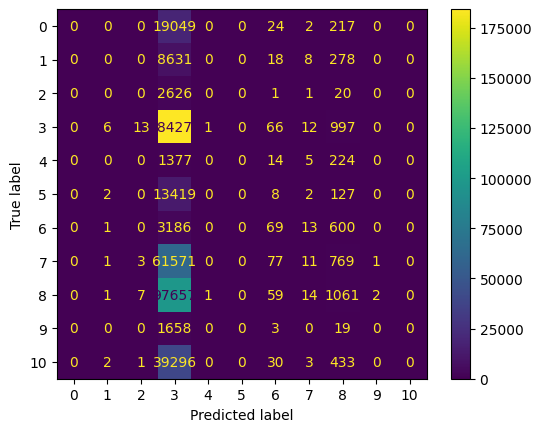

In [ ]:
pred = model.predict(x)
pred = encoder.inverse_transform(pred.reshape(-1,1))

conf = confusion_matrix(y, pred)
disp = ConfusionMatrixDisplay(conf)
disp.plot()

plt.show()


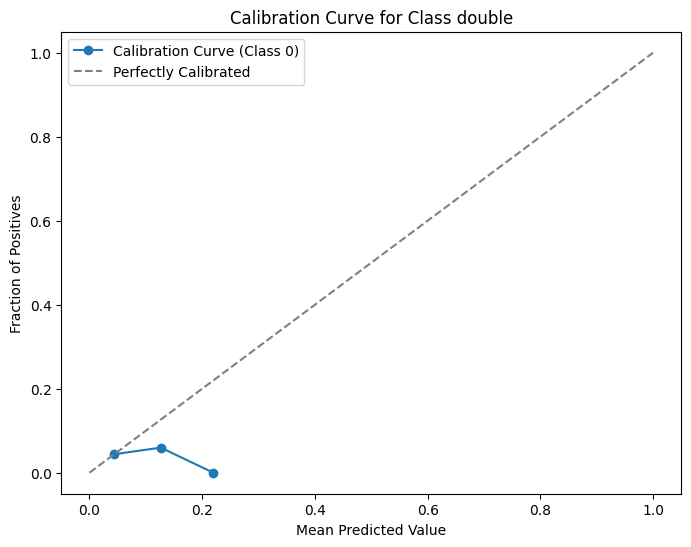

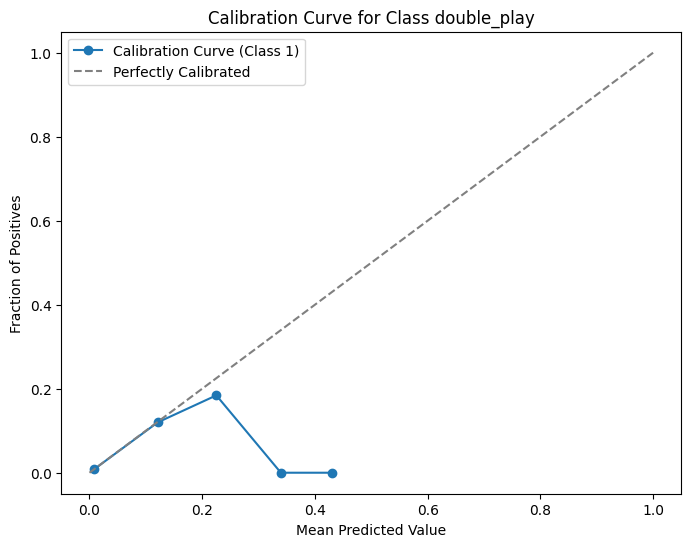

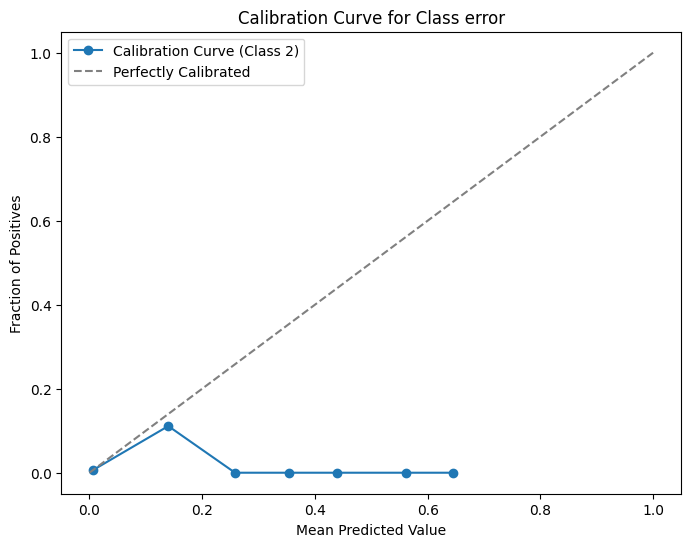

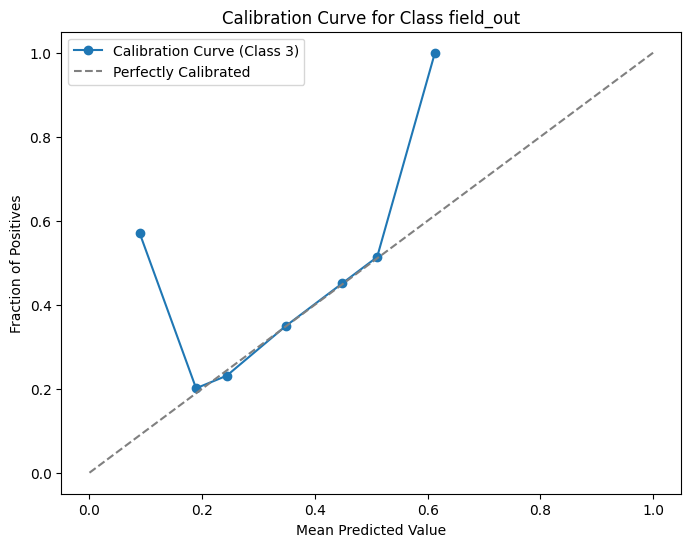

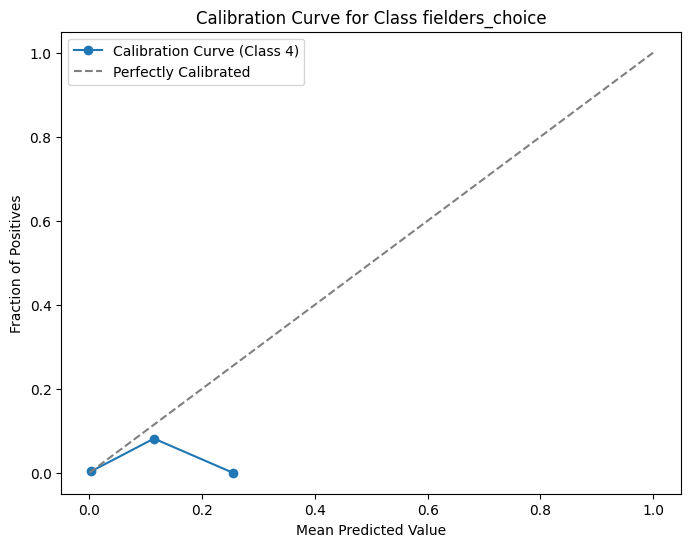

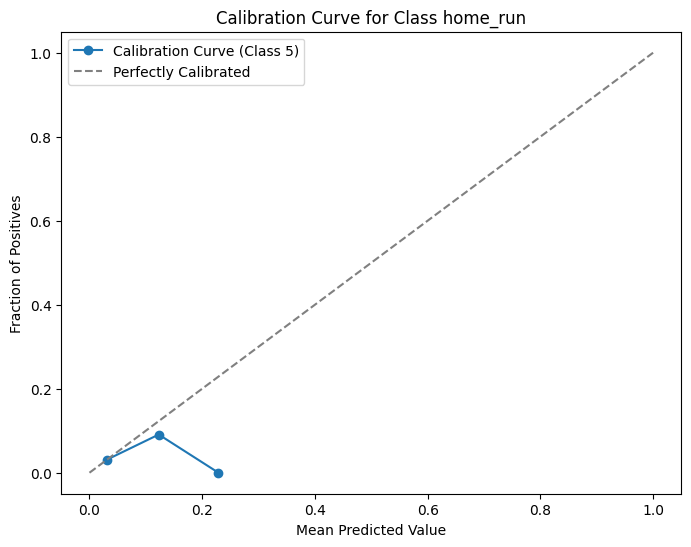

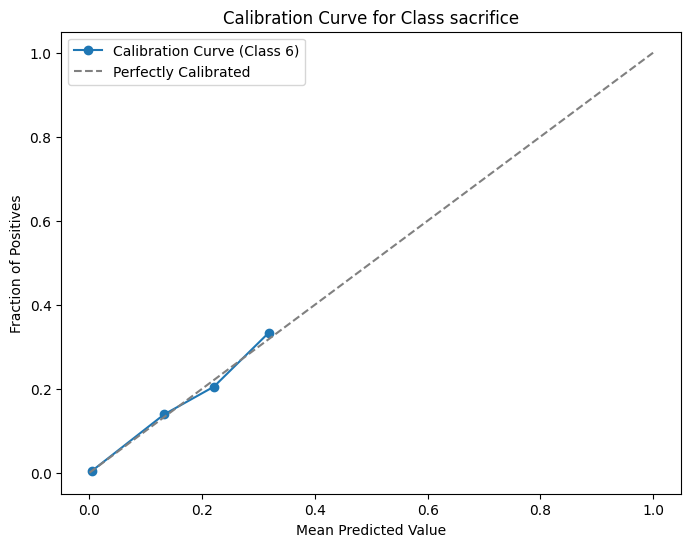

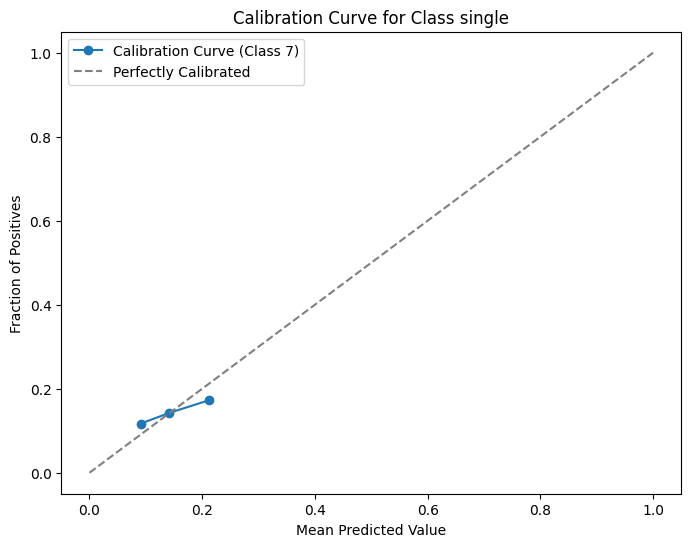

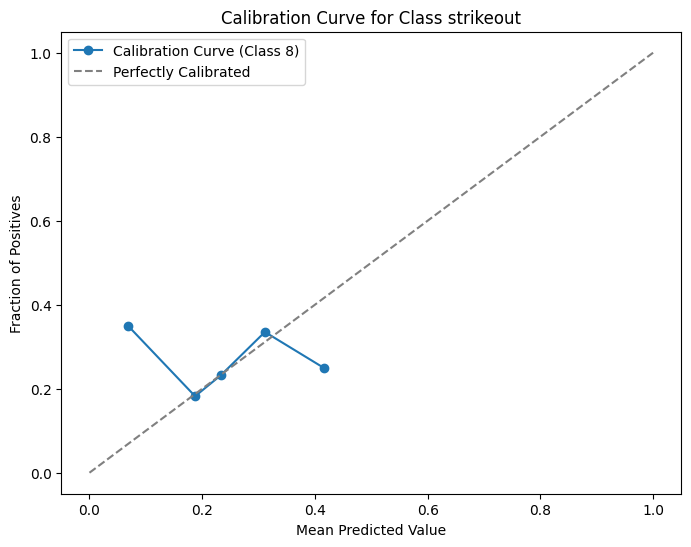

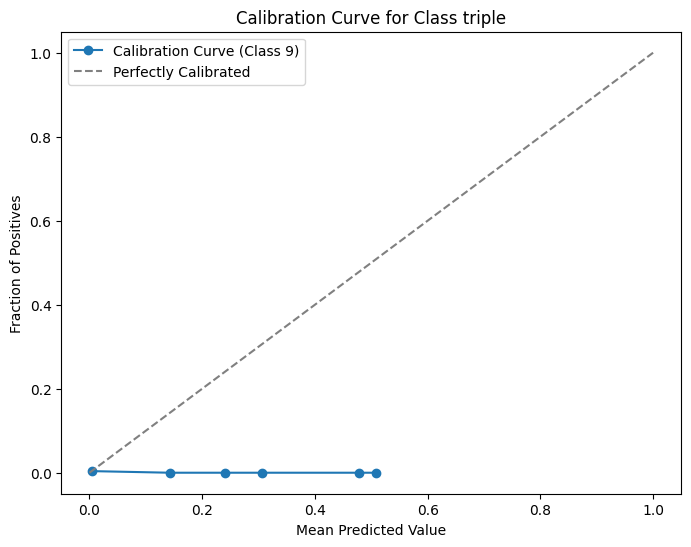

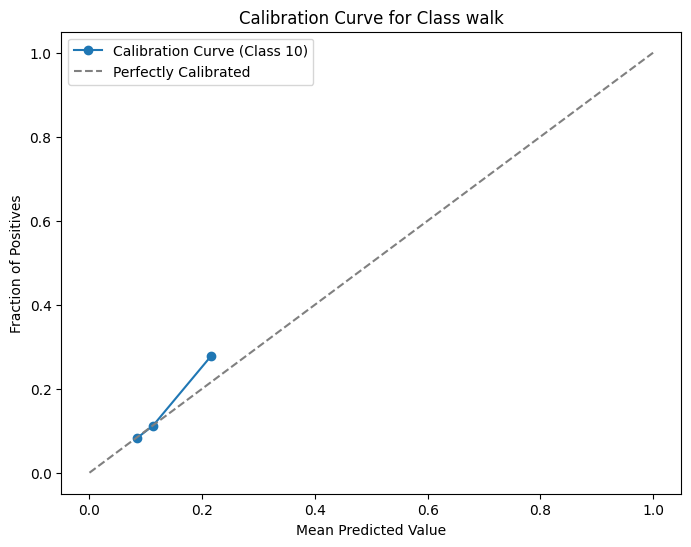

In [ ]:
y_prob = model.predict_proba(x)
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Assuming y_prob contains the predicted probabilities from the model
# y is the true labels and y_prob is the predicted probabilities for each class

# Loop over each class and plot calibration curve in a separate figure
for class_id in range(len(y_prob[0])):  # Assuming y_prob is (n_samples, n_classes)
    class_probabilities = y_prob[:, class_id]
    fraction_of_positives, mean_predicted_value = calibration_curve(y == class_id, class_probabilities, n_bins=10)
    
    # Create a new figure for each class
    plt.figure(figsize=(8, 6))
    plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label=f'Calibration Curve (Class {class_id})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
    plt.xlabel('Mean Predicted Value')
    plt.ylabel('Fraction of Positives')
    plt.title(f'Calibration Curve for Class {encoder.categories_[0][class_id]}')
    plt.legend()
    plt.show()



## Scrape Lineups from MLB.com
We will likely need to replace with rotowire or MLB game cards 
or something else with bench players once the season starts

# Simulate a Specific Game

#### Grab just the stats for the specific game to speed up filtering for each batter

need to do the following:
- find a way to not throw an error for players making debut, and then impute stats for them

In [ ]:
df = mlb_scrape('2024-09-15')


In [ ]:
# Segment the home and away lineups (IDs) #MAKE DYNAMIC
home_lineup = [int(player['id']) for player in lineups['lineups'][0]['home_lineup'].values()]
away_lineup = [int(player['id']) for player in lineups['lineups'][0]['away_lineup'].values()]
total_lineup = home_lineup + away_lineup # THIS DOES NOT ACCOUNT FOR PLAYERS TO COME OFF BENCH. MAKE SURE TO SCRAPE THEIR IDS TOO IN THE GET_LINEUPS.PY

# Segment the home and away Pitchers (IDs)
home_starting_pitchers = int(lineups['lineups'][0]['home_pitcher']['id'])
away_starting_pitchers = int(lineups['lineups'][0]['away_pitcher']['id'])
total_pitchers = [home_starting_pitchers, away_starting_pitchers] # THIS DOES NOT ACCOUNT FOR PLAYERS TO COME OFF BENCH. MAKE SURE TO SCRAPE THEIR IDS TOO IN THE GET_LINEUPS.PY

# Grab the stats rows belonging to each batter
filtered_batter_stats = batter_stats.loc[total_lineup]

# Grab the stats rows belonging to each pitcher
filtered_pitcher_stats = pitcher_stats.loc[total_pitchers]

# Grab the weather line from the game
with open('data/raw_weather/weather_data_2024', 'rb') as fpath:
    weather = pkl.load(fpath)

game_weather = weather[(weather.game_id.str.contains(f'{year}-{month}-{day}')) & ((weather.game_id.str.contains(lineups['games'][0][0])) |
                                                                                 (weather.game_id.str.contains(lineups['games'][0][1])))]

NameError: name 'lineups' is not defined

In [ ]:
weather

,Unnamed: 0,game_id,rain_percentage,temprature,wind_speed,wind_direction,is_dome
0,0,Dodgers @ Blue Jays on 2024-04-27 3:07 PM,"[0.0, 0.0, 0.0, 0.0]","[72.0, 72.0, 72.0, 72.0]","[0.0, 0.0, 0.0, 0.0]","[None, None, None, None]","[True, True, True, True]"
1,1,A's @ Orioles on 2024-04-27 4:05 PM,"[0.0, 35.0, 5.0, 7.0]","[55.0, 59.0, 59.0, 58.0]","[8.0, 10.0, 9.0, 9.0]","['right to left', 'R-L', 'Out', 'Out']","[False, False, False, False]"
2,2,Reds @ Rangers on 2024-04-27 4:05 PM,"[0.0, 0.0, 0.0, 0.0]","[72.0, 72.0, 72.0, 72.0]","[0.0, 0.0, 0.0, 0.0]","[None, None, None, None]","[True, True, True, True]"
3,3,Cardinals @ Mets on 2024-04-27 4:05 PM,"[0.0, 6.0, 12.0, 5.0]","[56.0, 57.0, 55.0, 53.0]","[17.0, 11.0, 13.0, 13.0]","['right to left', 'R-L', 'R-L', 'R-L']","[False, False, False, False]"
4,4,Cubs @ Red Sox on 2024-04-27 4:10 PM,"[0.0, 0.0, 0.0, 0.0]","[58.0, 63.0, 61.0, 60.0]","[17.0, 10.0, 10.0, 10.0]","['right to left', 'R-L', 'R-L', 'Out']","[False, False, False, False]"
...,...,...,...,...,...,...,...
1462,1462,Braves @ Padres on 2024-10-01 8:38 PM,"[0.0, 0.0, 0.0, 0.0]","[73.0, 72.0, 69.0, 67.0]","[8.0, 7.0, 6.0, 5.0]","['left to right', 'L-R', 'L-R', 'L-R']","[False, False, False, False]"
1463,1463,Tigers @ Astros on 2024-10-02 2:32 PM,"[0.0, 0.0, 0.0, 0.0]","[72.0, 72.0, 72.0, 72.0]","[0.0, 0.0, 0.0, 0.0]","[None, None, None, None]","[True, True, True, True]"
1464,1464,Royals @ Orioles on 2024-10-02 4:38 PM,"[18.0, 16.0, 16.0, 16.0]","[70.0, 69.0, 70.0, 68.0]","[2.0, 3.0, 2.0, 2.0]","['right to left', '', '', '']","[False, False, False, False]"
1465,1465,Mets @ Brewers on 2024-10-02 7:38 PM,"[0.0, 0.0, 0.0, 0.0]","[72.0, 72.0, 72.0, 72.0]","[0.0, 0.0, 0.0, 0.0]","[None, None, None, None]","[True, True, True, True]"


In [ ]:
weather[(weather.game_id.str.contains(f'{year}-{month}-{day}'))]

,Unnamed: 0,game_id,rain_percentage,temprature,wind_speed,wind_direction,is_dome


In [ ]:
# Predict a PA # IF SLOW CONVERT THE DF TO A DICT

# Combine the rolled batter/pitcher stats
batter = home_lineup[0]
pitcher = away_starting_pitchers

batter_df = filtered_batter_stats.loc[batter]
pitcher_df = filtered_pitcher_stats.loc[pitcher]

prediction_dataset = pd.concat([batter_df, pitcher_df, LA_stats])

### Add in the outside factors like ballpark, weather, etc. ###
prediction_dataset['ballpark'] = 'Target'
prediction_dataset['batter'] = 0
prediction_dataset['pitcher'] = 1
prediction_dataset['pitbat'] = 'RR'
prediction_dataset['on_3b'] = 1
prediction_dataset['on_2b'] = 0
prediction_dataset['on_1b'] = 0
prediction_dataset['outs_when_up'] = 0
prediction_dataset['inning'] = 9
prediction_dataset['inning_topbot'] = 0
prediction_dataset['bat_score'] = 0
prediction_dataset['fld_score'] = 0
prediction_dataset['Left to Right'] = 0
prediction_dataset['Right to Left'] = 0
prediction_dataset['in'] = 0
prediction_dataset['out'] = 0
prediction_dataset['zero'] = 0
prediction_dataset['temprature_sq'] = 4900

NameError: name 'home_lineup' is not defined

In [ ]:
predictions = model.predict_proba(prediction_dataset.to_frame().T)

In [ ]:
def generate_play_from_prediction_probas(prediction_probas):
    values = range(12)
    play_num = np.random.choice(values, p=prediction_probas.flatten())

    return encoder.inverse_transform(np.array([play_num]).reshape(-1, 1))[0][0]

l = []
for i in range(10000):
    play = generate_play_from_prediction_probas(predictions)
    l.append(play)
x = pd.Series(l)

NameError: name 'predictions' is not defined

In [ ]:
x.value_counts()

field_out          2399
sacrifice          2074
single             1582
strikeout          1118
walk                727
fielders_choice     582
double_play         547
double              401
home_run            360
intent_walk          76
error                71
triple               63
Name: count, dtype: int64